Megan Mouton

9/15/2018

Project 2; Unit 1

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)
    k2 = h*diffeq(y0 + 0.5*k1, t+h/2)
    k3 = h*diffeq(y0 + 0.5*k1, t+h/2)
    k4 = h*diffeq(y0 + k1, t+h)
    
    return y0 + (k1/6)+(k2/3)+(k3/3)+(k4/6)

Hovercrafts are moved with hard blown air across a solid smooth surface and sometimes even water. Hovercrafts are soon going to be the next best way to travel. 

To calculate the path of the hovercraft one must find the velocity of in the x direction and the y direction, and to find the change in velocity for the "next step" it is important to find the net force. 

In [47]:
def hovercraft(y0, t):
    dydt = np.zeros(8) #initialize array; each element is a derivative of y = [x, y, vx, vy, w, theta]
    dydt[0] = y0[2] # x velocity
    dydt[1] = y0[3] # y velocity
    dydt[2] = y0[6]/m #Fnet in x direction over the mass
    dydt[3] = y0[7]/m #Fnet in y direction over the mass
    dydt[4] = (r*F)/I #radius of where force is applied times the force over the I
    dydt[5] = y0[4]
    
    return dydt

If you can find the X postion and the Y postion of a lot of little steps, you can very accuratly see how the hovercraft will move with an applied force at a certian distance from the center of the hovercraft. The iterate function above runs several times to find the values of very small time steps to get an accurate description of the movement of the hovercraft. 

In [48]:
def iterate(xi = 0, yi = 0, Vxi = 0, Vyi = 0, Thetai = 0, Omegai = 0):
    #Initial Conditions:
    t = 0
    dt = 0.001
    theta = Thetai
    Fx = -F*np.sin(theta)
    Fy = F*np.cos(theta)

    
    y0 = [xi, yi, Vxi, Vyi, Omegai, Thetai, Fx, Fy]
    ta, xn, yn, xV, yV = [],[],[],[],[] #lists to store time, numerical x-position, y-position, x-velocity, v-velocity

    while t<1.0:
        ta.append(t)
        xn.append(y0[0]) #numerical position
        yn.append(y0[1]) #numerical position
        xV.append(y0[2])
        yV.append(y0[3])

       

        y1 = RK4(hovercraft, y0, t, dt) #update y[n]

        for i in range(len(y1)): #reset y0 to the new vector
           y0[i] = y1[i]

           
        theta = y0[5]
        Fx = -F*np.sin(theta)
        Fy = F*np.cos(theta)
        
        y0[6] = Fx
        y0[7] = Fy
        
        t = t + dt #update clock
        
    values = [ta, xn, yn, xV, yV]
        
    return(values) 


 ## The Following Graphs show when there is a force being applied to the center of the hovercraft:

The values were set so that all the force is applied to the middle of the hovercraft. There will only be motion in the x-direction. 

In [49]:
#Global needed variables::

m = 70 #kg
R = 1 #m
I = ((1/2)*m*R**2) 
F = 100
r = 0
centerforce = iterate(0, 0, 0, 0, 0, 0)

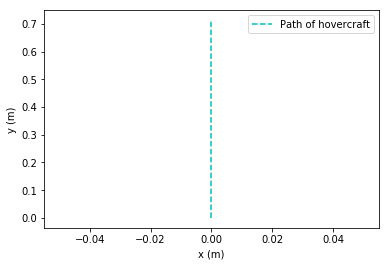

In [50]:
#Here the path of the hovercraft is being plotted
plt.figure()
plt.plot(centerforce[1], centerforce[2], 'c--', label='Path of hovercraft')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()


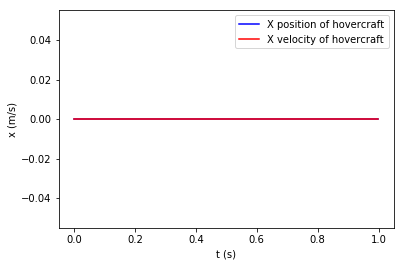

In [51]:
#Here the X velocity is being plotted
plt.figure()
plt.plot(centerforce[0], centerforce[1], 'b', label = "X position of hovercraft")
plt.plot(centerforce[0], centerforce[3], 'r', label = "X velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('x (m/s)')
plt.legend()
plt.show()

The hovercraft will not move in the x direction because the force is only being applied to the middle of the disk.
Think about pushing a button in, you only apply a force in the middle of the button, the button does not move left and right, it only moves up and down. Similarly with the hovercraft, it will not move left and right it will only move up and down. 

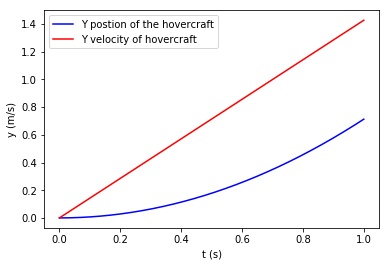

In [52]:
#Here the Y velocity is being plotted
plt.figure()
plt.plot(centerforce[0], centerforce[2], 'b', label = "Y postion of the hovercraft")
plt.plot(centerforce[0], centerforce[4], 'r', label = "Y velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('y (m/s)')
plt.legend()
plt.show()

This graph makes sense because the hovercraft will move up and down, (the Y direction) when a force is applied to the middle of the hovercraft

## The following are graphs when the force is being applied to the outter edge of the hovercraft:

The values were set so that all the force would be put on the outer edge of the hovercraft. The hovercraft now will have movement in the x-direction, the y-direction and will also have a spin. 

In [53]:
#Global needed variables::

m = 70 #kg
R = 1 #m
I = ((1/2)*m*R**2) 
F = 100
r = R

outterforce = iterate(xi = 0, yi = 0, Vxi = 0, Vyi = 0, Thetai = 0, Omegai = 0)

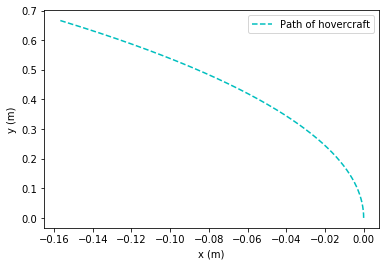

In [54]:
#Here the path of the hovercraft is being plotted
plt.figure()
plt.plot(outterforce[1], outterforce[2], 'c--', label='Path of hovercraft')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

This makes sense because as the x and the y moments change they are not going to be perfectly in sync with one another. 

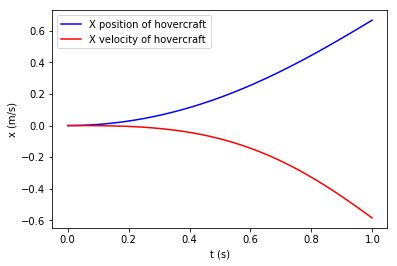

In [55]:
#Here the X velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "X position of hovercraft")
plt.plot(outterforce[0], outterforce[3], 'r', label = "X velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('x (m/s)')
plt.legend()
plt.show()

The further away the hovercraft goes, the fast the hovercraft seems to get in the negative direction. 


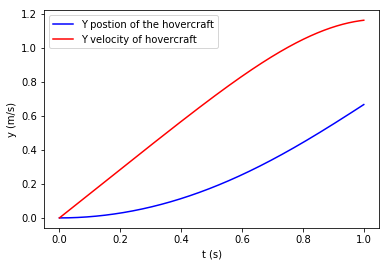

In [56]:
#Here the Y velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "Y postion of the hovercraft")
plt.plot(outterforce[0], outterforce[4], 'r', label = "Y velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('y (m/s)')
plt.legend()
plt.show()

The further the y postion rises, the faster the hovercraft's velocity increases. The higher the craft gets, the faster it goes up.

## The following are graphs when the force multiplied by 10:

When you increase the force, you increase the velocity and the speed of which the hovercraft goes. 

In [57]:
#Global needed variables::

m = 70 #kg
R = 1 #m
I = ((1/2)*m*R**2) 
F = 1000
r = R

outterforce = iterate(xi = 0, yi = 0, Vxi = 0, Vyi = 0, Thetai = 0, Omegai = 0)

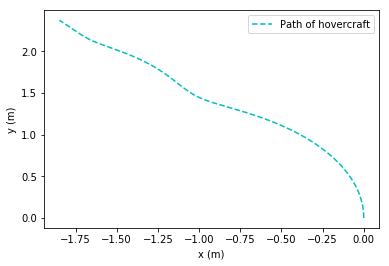

In [58]:
#Here the path of the hovercraft is being plotted
plt.figure()
plt.plot(outterforce[1], outterforce[2], 'c--', label='Path of hovercraft')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

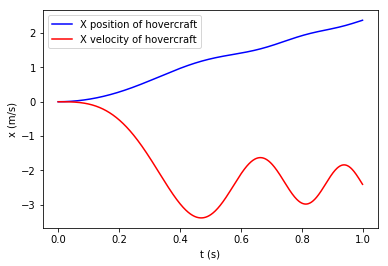

In [59]:
#Here the X velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "X position of hovercraft")
plt.plot(outterforce[0], outterforce[3], 'r', label = "X velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('x (m/s)')
plt.legend()
plt.show()

If you notice the plot of the y-velocity the peaks and the valleys of the graphs are opposite of each other. The faster the hovercraft goes in the X-direction, the slower it goes in the Y-direction. Same for when it goes slower.

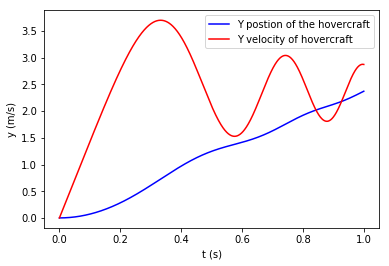

In [60]:
#Here the Y velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "Y postion of the hovercraft")
plt.plot(outterforce[0], outterforce[4], 'r', label = "Y velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('y (m/s)')
plt.legend()
plt.show()

If you notice the plot of the x-velocity the peaks and the valleys of the graphs are opposite of each other. The faster the hovercraft goes in the y-direction, the slower it goes in the x-direction. Same for when it goes slower.

## The following are graphs have an increased value of theta, giving the hovercraft a greater initial spin:

In [61]:
#Global needed variables::

m = 70 #kg
R = 1 #m
I = ((1/2)*m*R**2) 
F = 100
r = R
centerforce = iterate(0, 0, 0, 0, np.pi/2, 0)

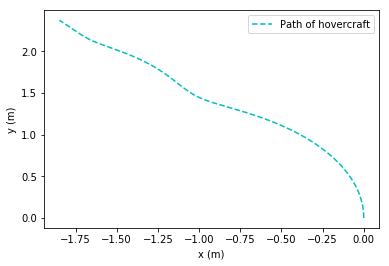

In [62]:
#Here the path of the hovercraft is being plotted
plt.figure()
plt.plot(outterforce[1], outterforce[2], 'c--', label='Path of hovercraft')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

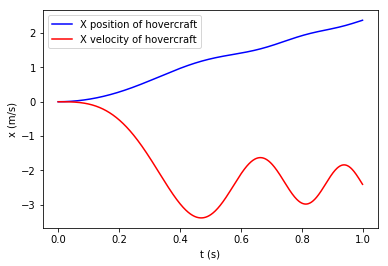

In [63]:
#Here the X velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "X position of hovercraft")
plt.plot(outterforce[0], outterforce[3], 'r', label = "X velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('x (m/s)')
plt.legend()
plt.show()

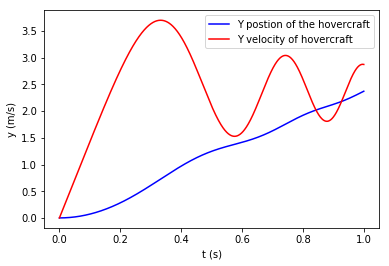

In [64]:
#Here the Y velocity is being plotted
plt.figure()
plt.plot(outterforce[0], outterforce[2], 'b', label = "Y postion of the hovercraft")
plt.plot(outterforce[0], outterforce[4], 'r', label = "Y velocity of hovercraft")
plt.xlabel('t (s)')
plt.ylabel('y (m/s)')
plt.legend()
plt.show()

Hovercrafts are pretty interesting and have movements that can be predicted with the calculation of it's movements. With a better understanding of how they work, they might be able to be implemented into more common future use. 